# Benchmark M3.1: A Single Root in a Static Soil

by Daniel Leitner, Andrea Schnepf, Felicien Meunier

##Comparison to numerical solutions

We compare different numerical codes by solving the benchmarking problems. In the following we link to notebooks implement Benchmark M3.1.

    [Python Code from Schnepf et al. 2018](Xylem flux - Python code.ipynb)
    [Dumux](Xylem flux - Dumux.ipynb)

For an automatic comparison of the numerical results, save the results in a text file with two lines, containing comma separated depth values [cm] in the first line, and pressure head [cm] in the second, located in the folder `/M31 Numerical results/simulatorname`.

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from math import *
from scipy.interpolate import interp1d

# normalized root mean squared error
def nRMSE(y_ana, y_num):
    assert len(y_ana)==len(y_num), "number of analytical solutions y_ana must equalt number of numerical solutions y_num"
    n = len(y_ana)
    rmse = np.sqrt(np.sum(np.square(y_ana-y_num))/n)
    return rmse/np.abs(np.mean(y_ana)) 

In [6]:
L = 50            # length of single straight root [cm]
a = 0.2           # radius  [cm]
kx = 0.0432        # axial conductivity [cm^3 / day] 
kr = 1.73e-4       # radial conductivity [1 / day]
p_s = -200        # static soil matric potiential [cm]
p0 = -1000        # dirichlet bc at top [cm]

In [7]:
# Analytical solution
c = 2*a*pi*kr/kx
p_r = lambda z: p_s + d[0]*exp(sqrt(c)*z) + d[1]*exp(-sqrt(c)*z)

# Boundary conditions
AA = np.array([[1,1], [sqrt(c)*exp(sqrt(c)*(-L)), -sqrt(c)*exp(-sqrt(c)*(-L))] ]) 
bb = np.array([p0-p_s, -1]) 
d = np.linalg.solve(AA, bb) 

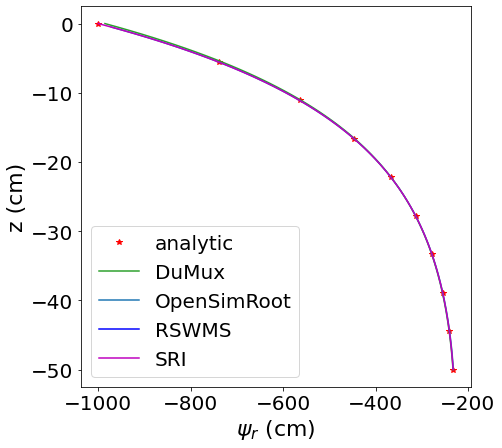

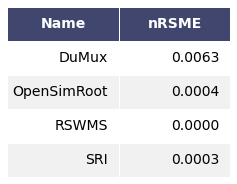

In [8]:
fig=plt.figure(figsize=(7,7))   # analytical solution
y = np.linspace(0,-50,10)
plt.plot(list(map(p_r, y)),y,"r*")

j = 0 # number of files
name, nrsme, nn = [], [], []
col=["C2","C0","b","m","g","k"];
l = ["analytic"]
for dirname, dirnames, filenames in os.walk('M31 Numerical results/.'):
    filenames.sort()
    for i,f in enumerate(filenames):
        try:
            l.append(f); name.append(f); 
            data = np.loadtxt("M31 Numerical results/"+f,delimiter=',')
            plt.plot(data[1,:],-np.abs(data[0,:]),col[i]) # numeric solution         
            j += 1     
            # Evaluate
            n = len(data[1,:])
            nn.append(n)
            t_a = np.linspace(-45,-5,100)
            pr_a = list(map(p_r, t_a))          
            interp = interp1d(-np.abs(data[0,:]),data[1,:],  kind='linear', fill_value='extrapolate' ) 
            pr_n = interp(t_a)            
            # calculate measures
            nrsme.append(nRMSE(pr_a,pr_n))                
        except Exception as ex:
            print("Something went wrong with file "+f)    
            print(ex)            
plt.xlabel("$\\psi_r$ (cm)")
plt.ylabel("z (cm)")
plt.legend(l)
#plt.xticks(np.arange(-6,4,3))
#plt.yticks(np.arange(-16,1,4))
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=22)     # fontsize of the axes title
plt.rc('axes', labelsize=22)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=22)  # fontsize of the figure title
plt.savefig('m31_results.png', dpi=300, bbox_inches = "tight")
plt.show()

import pandas as pd 
# initialize list of lists 
data_ = np.array([name, nrsme])
data_ = np.array(data_.transpose())
# Create the pandas DataFrame 
df = pd.DataFrame(data_, columns = ['Name','nRSME'] )
df['nRSME'] = df['nRSME'].astype(float)
df['nRSME'] = df['nRSME'].map('{:,.4f}'.format)
#df['nNSE'] = df['nNSE'].astype(float)
#df['nNSE'] = df['nNSE'].map('{:,.4f}'.format)
# print dataframe. 
df.style.set_table_styles(
[{'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#eee')]}, 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white')]},
 {'selector': 'th',
  'props': [('background', '#606060'), 
            ('color', 'white'),
            ('font-family', 'verdana')]},
 {'selector': 'td',
  'props': [('font-family', 'verdana')]},
]
).hide_index()
import six
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax.get_figure(), ax

fig,ax = render_mpl_table(df, header_columns=0, col_width=2.0)
fig.savefig("table_m3l.png")


## References

Doussan, C., Pierret, A., Garrigues, E., and Pages, L. (2006). Water uptake by plant roots: II - Modelling of water transfer in the soil root-system with explicit account of flow within the root system - comparison with experiments. *Plant and Soil*, 283(1-2):99–117.

Roose, T. and Fowler, A. C. (2004). A model for water uptake by plant roots. *Journal of Theoretical Biology*, 228(2):155–171.

Schnepf, A., Leitner, D., Landl, M., Lobet, G., Mai, T.H., Morandage S., Sheng, C., Zoerner, M., Vanderborght, J., Vereecken, H. (2018) CRootBox: a structural-functional modelling framework for root systems. *Annals of Botany*, 121 (5), 1033-1053
